# EDA

## Extract MySQL DB 

In [9]:
from sqlalchemy import create_engine
import pandas as pd

# Insert Database connection details
user = 'root'
password = 'mYsT4nd4rdQu3rYL4ngu4g3'
host = 'localhost'
database = 'nba_database'

# Create connection string
connection_string = f'mysql+pymysql://{user}:{password}@{host}/{database}'

# Create SQLAlchemy engine
engine = create_engine(connection_string)

In [10]:
# Define the table name
table_name = 'betting_and_game_table'

# Query the database and load data into a DataFrame
df = pd.read_sql(f'SELECT * FROM {table_name};', con=engine)

# Display the first few rows of the DataFrame
display(df)

,GAME_ID,SEASON_ID,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_DATE,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,...,AST_TOV_RATIO_HOME,AST_TOV_RATIO_AWAY,HOME_AWAY_FGM_RATIO,HOME_AWAY_FGA_RATIO,SPREAD_DIFF,OVER_DIFF,HomeML_Prob,AwayML_Prob,2H_Spread_Diff,2H_Over_Diff
0,20700019,22007,1610612742,DAL,Dallas Mavericks,2007-11-02,DAL @ ATL,L,240,35.0,...,1.333333,1.400000,1.028571,0.987500,-0.5,-1.0,0.346783,0.882338,-0.5,-96.5
1,20700056,22007,1610612756,PHX,Phoenix Suns,2007-11-07,PHX @ ATL,L,240,35.0,...,1.375000,1.400000,1.171429,1.046512,-0.5,-1.5,0.373301,0.869850,0.0,-103.5
2,20700086,22007,1610612764,WAS,Washington Wizards,2007-11-11,WAS @ ATL,W,240,38.0,...,1.909091,2.166666,0.789474,0.875000,-0.5,-3.0,0.869850,0.373301,0.5,-92.5
3,20700106,22007,1610612766,CHA,Charlotte Bobcats,2007-11-14,CHA @ ATL,L,240,41.0,...,1.705882,1.357143,1.121951,0.927711,-0.5,0.5,0.876229,0.359935,7.0,-94.5
4,20700123,22007,1610612760,SEA,Seattle SuperSonics,2007-11-16,SEA @ ATL,W,290,47.0,...,1.600000,1.769231,0.957447,1.000000,1.5,-1.5,0.896477,0.314940,0.5,-104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17108,22100241,22021,1610612748,MIA,Miami Heat,2021-11-20,MIA @ WAS,L,240,38.0,...,1.100000,1.500000,0.947368,0.913580,0.5,-3.0,0.478427,0.794582,-0.5,-107.0
17109,22100254,22021,1610612766,CHA,Charlotte Hornets,2021-11-22,CHA @ WAS,W,240,40.0,...,1.277778,2.100000,0.900000,1.032967,0.0,0.0,0.833662,0.414501,-0.5,-112.5
17110,22100321,22021,1610612750,MIN,Minnesota Timberwolves,2021-12-01,MIN @ WAS,L,240,37.0,...,2.428571,1.153846,1.216216,1.034091,-1.0,0.5,0.825526,0.428537,1.0,-112.0
17111,22100334,22021,1610612739,CLE,Cleveland Cavaliers,2021-12-03,CLE @ WAS,W,240,42.0,...,2.100000,1.875000,0.904762,0.921348,0.0,-0.5,0.808318,0.456934,-4.0,-107.0


In [11]:
print(df['GAME_DATE'].min())
print(df['GAME_DATE'].max())

2007-10-30
2021-12-20


## Visualize trends and patterns

### Winning Team vs. Key Statistics

- Objective: Identify which statistics have the most significant impact on winning.
- Columns Used: `PTS_HOME`, `PTS_AWAY`, `FG_PCT_HOME`, `FG_PCT_AWAY`, `REB_TOTAL_HOME`, `REB_TOTAL_AWAY`, `AST_TOV_RATIO_HOME`, `AST_TOV_RATIO_AWAY`, `Win`
- Visualization: Box plots to compare key statistics between winning and losing teams.

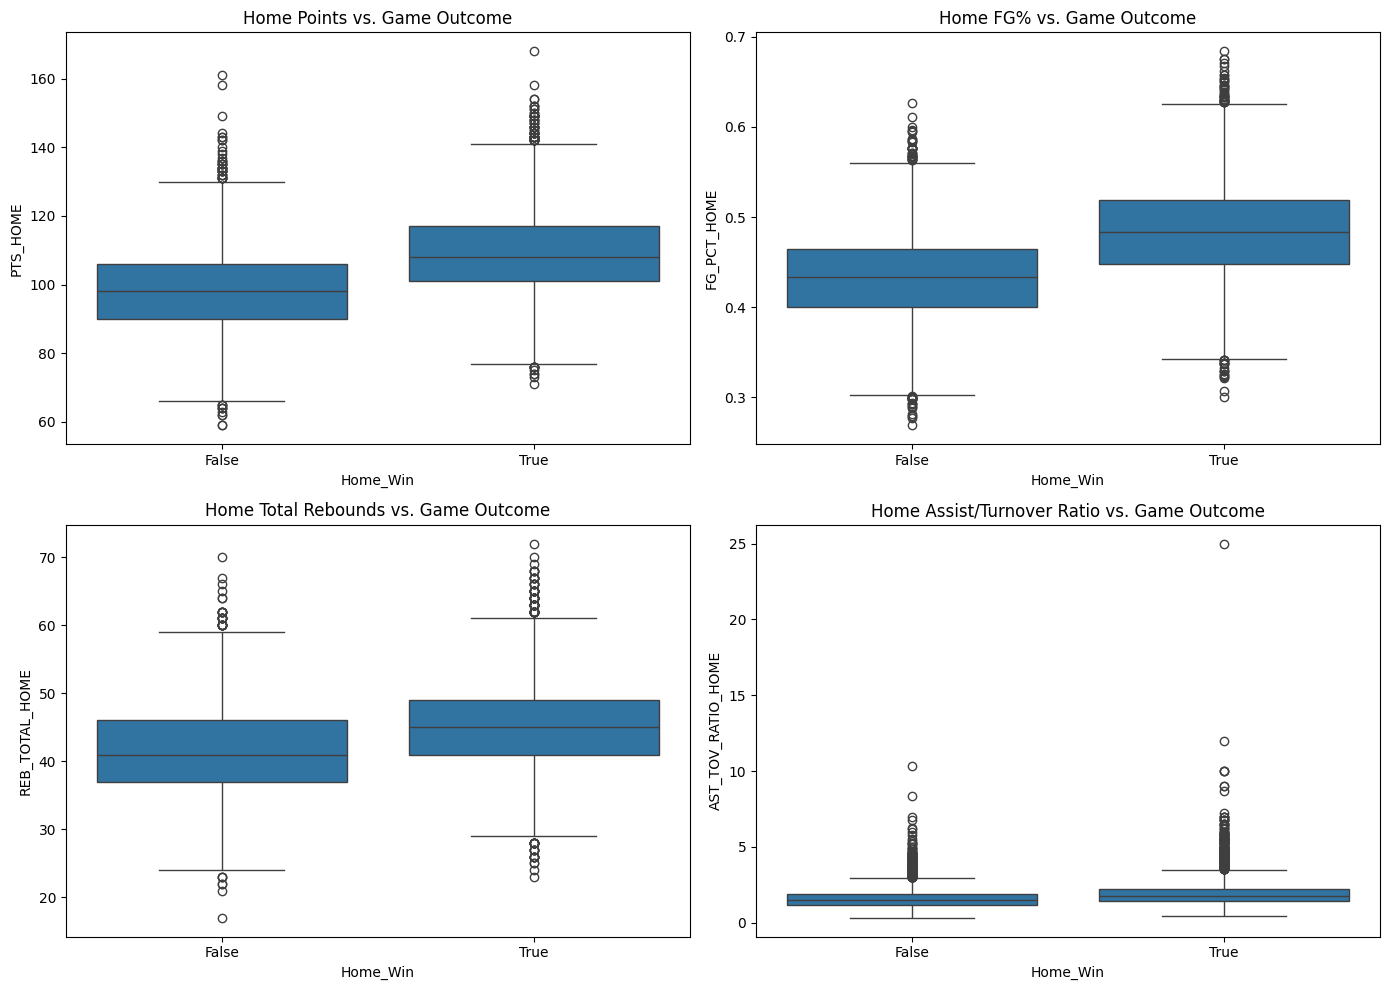

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a 'Home Win' column
df['Home_Win'] = df['Win'] == 1

# Box plots for key statistics
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Home_Win', y='PTS_HOME', data=df)
plt.title('Home Points vs. Game Outcome')

plt.subplot(2, 2, 2)
sns.boxplot(x='Home_Win', y='FG_PCT_HOME', data=df)
plt.title('Home FG% vs. Game Outcome')

plt.subplot(2, 2, 3)
sns.boxplot(x='Home_Win', y='REB_TOTAL_HOME', data=df)
plt.title('Home Total Rebounds vs. Game Outcome')

plt.subplot(2, 2, 4)
sns.boxplot(x='Home_Win', y='AST_TOV_RATIO_HOME', data=df)
plt.title('Home Assist/Turnover Ratio vs. Game Outcome')

plt.tight_layout()
plt.show()

### Field Goal Percentage (Home vs. Away)

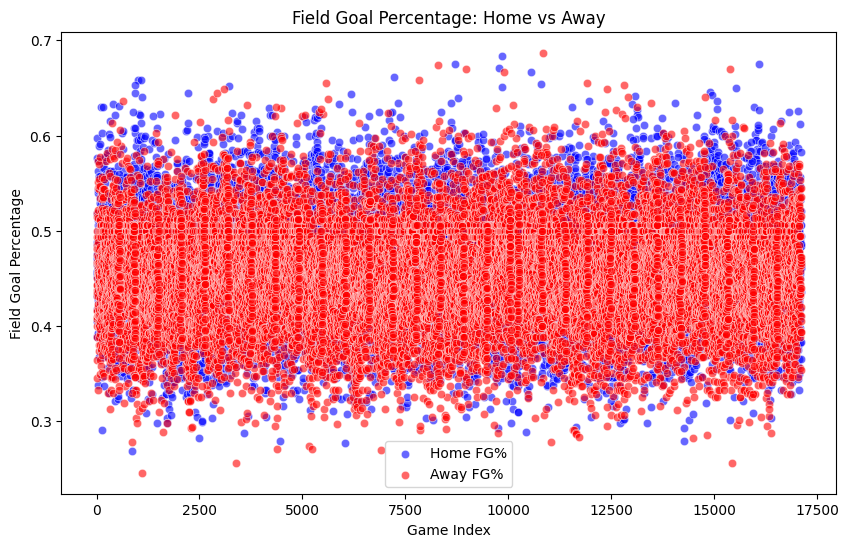

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['FG_PCT_HOME'], label='Home FG%', color='blue', alpha=0.6)
sns.scatterplot(x=df.index, y=df['FG_PCT_AWAY'], label='Away FG%', color='red', alpha=0.6)
plt.xlabel('Game Index')
plt.ylabel('Field Goal Percentage')
plt.title('Field Goal Percentage: Home vs Away')
plt.legend()
plt.show()

### Line Plot of Rolling Averages Over Time

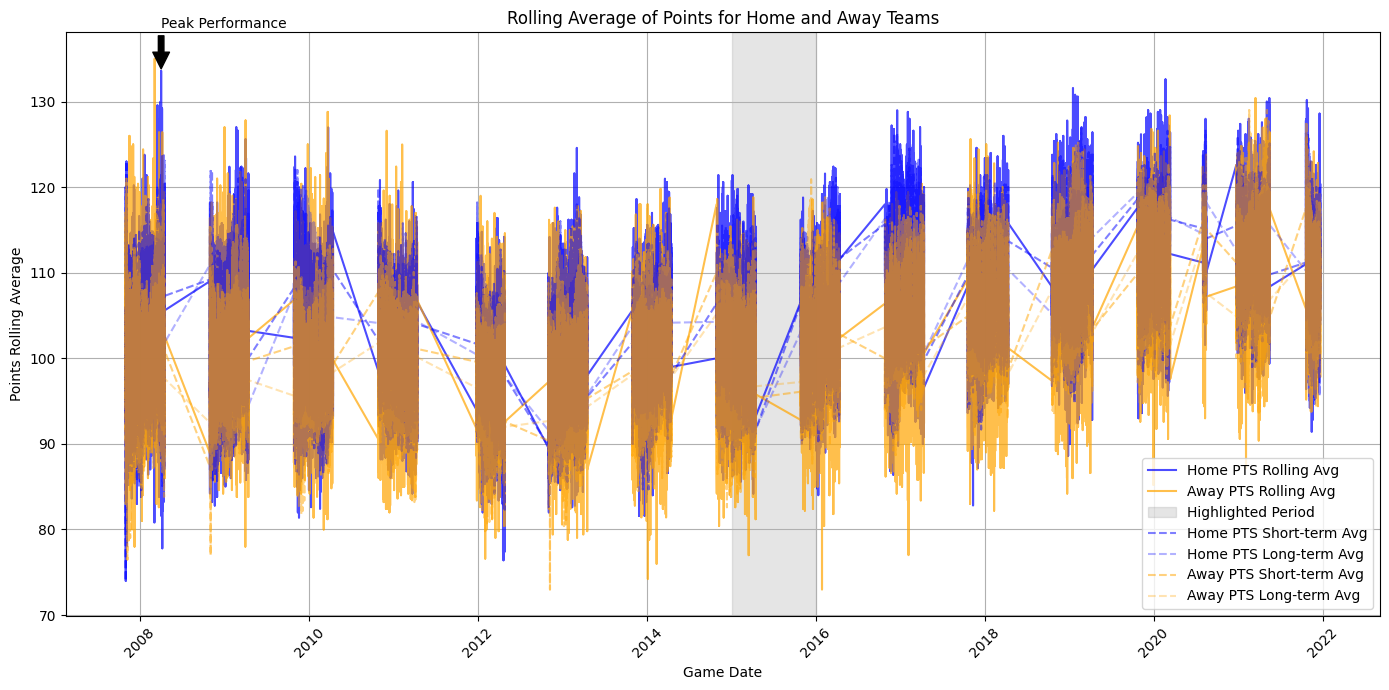

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'GAME_DATE' is in datetime format and sorted
df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])
df = df.sort_values(by='GAME_DATE')

# Plot rolling averages
plt.figure(figsize=(14, 7))

# Plot Home Team Rolling Averages
plt.plot(df['GAME_DATE'], df['Home_PTS_RollAvg'], label='Home PTS Rolling Avg', color='blue', alpha=0.7)

# Plot Away Team Rolling Averages
plt.plot(df['GAME_DATE'], df['Away_PTS_RollAvg'], label='Away PTS Rolling Avg', color='orange', alpha=0.7)

# Highlight periods with significant changes
# For example, highlighting a specific period (e.g., 2015-2016 season)
highlight_start = '2015-01-01'
highlight_end = '2016-01-01'
plt.axvspan(highlight_start, highlight_end, color='gray', alpha=0.2, label='Highlighted Period')

# Add rolling averages with different window sizes for comparison (e.g., 10-game and 30-game)
rolling_window_short = 10
rolling_window_long = 30

df['Home_PTS_RollAvg_Short'] = df.groupby('HomeTeam')['PTS_HOME'].transform(lambda x: x.rolling(window=rolling_window_short, min_periods=1).mean())
df['Home_PTS_RollAvg_Long'] = df.groupby('HomeTeam')['PTS_HOME'].transform(lambda x: x.rolling(window=rolling_window_long, min_periods=1).mean())

plt.plot(df['GAME_DATE'], df['Home_PTS_RollAvg_Short'], linestyle='--', color='blue', alpha=0.5, label='Home PTS Short-term Avg')
plt.plot(df['GAME_DATE'], df['Home_PTS_RollAvg_Long'], linestyle='--', color='blue', alpha=0.3, label='Home PTS Long-term Avg')

df['Away_PTS_RollAvg_Short'] = df.groupby('AwayTeam')['PTS_AWAY'].transform(lambda x: x.rolling(window=rolling_window_short, min_periods=1).mean())
df['Away_PTS_RollAvg_Long'] = df.groupby('AwayTeam')['PTS_AWAY'].transform(lambda x: x.rolling(window=rolling_window_long, min_periods=1).mean())

plt.plot(df['GAME_DATE'], df['Away_PTS_RollAvg_Short'], linestyle='--', color='orange', alpha=0.5, label='Away PTS Short-term Avg')
plt.plot(df['GAME_DATE'], df['Away_PTS_RollAvg_Long'], linestyle='--', color='orange', alpha=0.3, label='Away PTS Long-term Avg')

# Add annotations for key points (optional)
# Example: annotating a peak
peak_date = df.loc[df['Home_PTS_RollAvg'].idxmax(), 'GAME_DATE']
peak_value = df['Home_PTS_RollAvg'].max()
plt.annotate('Peak Performance',
             xy=(peak_date, peak_value),
             xytext=(peak_date, peak_value + 5),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Title and labels
plt.title('Rolling Average of Points for Home and Away Teams')
plt.xlabel('Game Date')
plt.ylabel('Points Rolling Average')
plt.legend()
plt.grid(True)

# Rotate x-axis labels and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

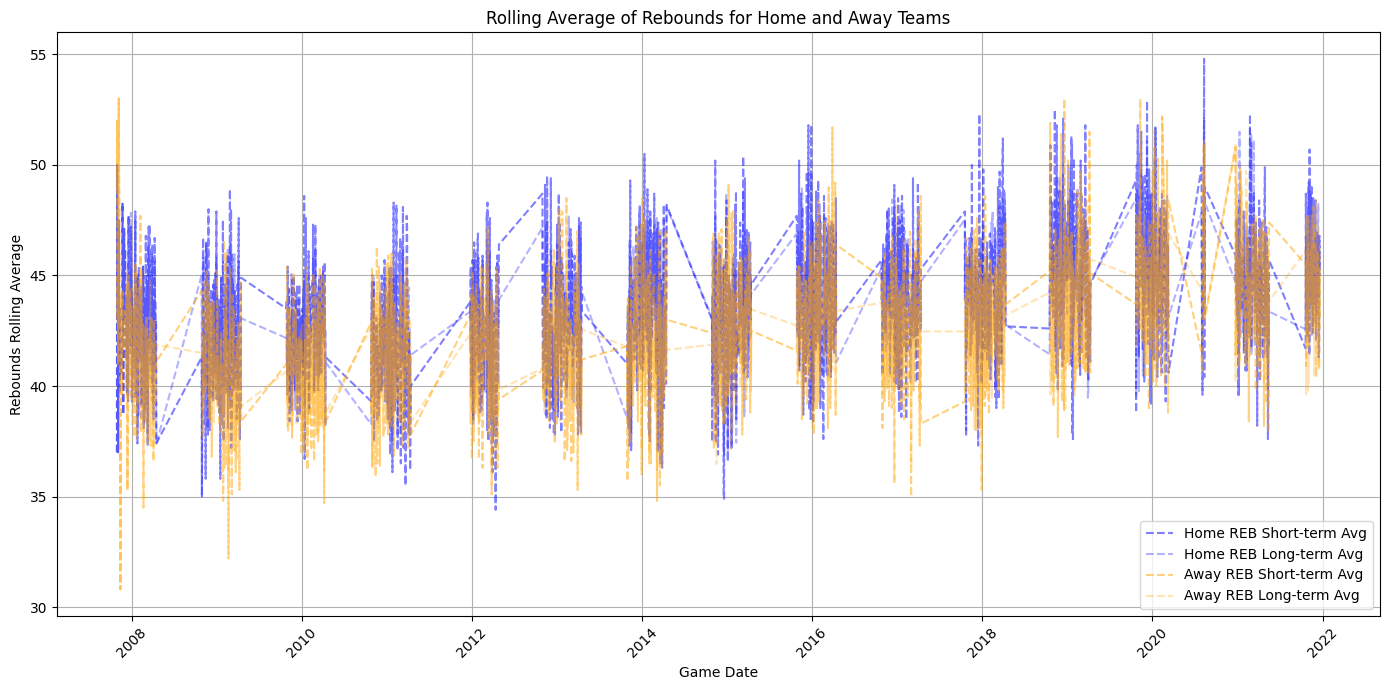

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure 'GAME_DATE' is in datetime format and sorted
df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])
df = df.sort_values(by='GAME_DATE')

# Define rolling window sizes
rolling_window_short = 10
rolling_window_long = 30

# Calculate rolling averages for home team rebounds
df['Home_REB_RollAvg_Short'] = df.groupby('HomeTeam')['REB_TOTAL_HOME'].transform(
    lambda x: x.rolling(window=rolling_window_short, min_periods=1).mean())
df['Home_REB_RollAvg_Long'] = df.groupby('HomeTeam')['REB_TOTAL_HOME'].transform(
    lambda x: x.rolling(window=rolling_window_long, min_periods=1).mean())

# Calculate rolling averages for away team rebounds
df['Away_REB_RollAvg_Short'] = df.groupby('AwayTeam')['REB_TOTAL_AWAY'].transform(
    lambda x: x.rolling(window=rolling_window_short, min_periods=1).mean())
df['Away_REB_RollAvg_Long'] = df.groupby('AwayTeam')['REB_TOTAL_AWAY'].transform(
    lambda x: x.rolling(window=rolling_window_long, min_periods=1).mean())

# Downsample data for better readability (e.g., every 10th data point)
sample_rate = 10
df_sampled = df.iloc[::sample_rate, :]

# Plot rolling averages for rebounds
plt.figure(figsize=(14, 7))

# Home Team Rebounds
plt.plot(df_sampled['GAME_DATE'], df_sampled['Home_REB_RollAvg_Short'], linestyle='--', color='blue', alpha=0.5, label='Home REB Short-term Avg')
plt.plot(df_sampled['GAME_DATE'], df_sampled['Home_REB_RollAvg_Long'], linestyle='--', color='blue', alpha=0.3, label='Home REB Long-term Avg')

# Away Team Rebounds
plt.plot(df_sampled['GAME_DATE'], df_sampled['Away_REB_RollAvg_Short'], linestyle='--', color='orange', alpha=0.5, label='Away REB Short-term Avg')
plt.plot(df_sampled['GAME_DATE'], df_sampled['Away_REB_RollAvg_Long'], linestyle='--', color='orange', alpha=0.3, label='Away REB Long-term Avg')

# Title and labels
plt.title('Rolling Average of Rebounds for Home and Away Teams')
plt.xlabel('Game Date')
plt.ylabel('Rebounds Rolling Average')
plt.legend()
plt.grid(True)

# Rotate x-axis labels and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()